## **1. Data Collection**

In [ ]:
import pandas as pd

# Load tiap file
df_bts = pd.read_csv('BTS.csv')
df_nct = pd.read_csv('NCT.csv')
df_bp = pd.read_csv('BLACKPINK.csv')

# Tambahkan kolom label
df_bts['label'] = 'bts'
df_nct['label'] = 'nct'
df_bp['label'] = 'blackpink'

# Gabungkan semua
df_final = pd.concat([df_bts, df_nct, df_bp], ignore_index=True)

# Simpan ke file CSV gabungan
df_final.to_csv('dataset_final.csv', index=False)


In [ ]:
# Pindahkan kolom 'label' ke sebelah kanan 'full_text'
cols = list(df_final.columns)

if 'full_text' in cols and 'label' in cols:
    cols.remove('label')                # hapus dulu label
    insert_at = cols.index('full_text') + 1  # posisi setelah full_text
    cols.insert(insert_at, 'label')     # masukkan label di posisi itu
    df_final = df_final[cols]           # reorder kolom

df_final.to_csv('kpop_dataset_final.csv', index=False)


In [ ]:
# Memuat Dataset
import pandas as pd

# Ganti path sesuai lokasi file di Google Colab
df = pd.read_csv('kpop_dataset_final.csv', encoding='latin1')

# Tampilkan 5 data teratas
df.head()


,conversation_id_str,created_at,favorite_count,full_text,label,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.920000e+18,Wed May 07 23:32:36 +0000 2025,0,me transformaram em um bts KKKMKKKKKKK,bts,1.920000e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192026050978321...,1.190000e+18,NaN
1,1.920000e+18,Wed May 07 23:32:04 +0000 2025,11,@BTS_twt___JKOOK Selamat pagi juga JEON https:...,bts,1.920000e+18,https://pbs.twimg.com/tweet_video_thumb/GqYioG...,BTS_twt___JKOOK,in,NaN,0,0,0,https://x.com/undefined/status/192026037480660...,1.610000e+18,NaN
2,1.920000e+18,Wed May 07 23:29:36 +0000 2025,0,@kiyyoowo ihhhhh aku ketinggalan,bts,1.920000e+18,NaN,kiyyoowo,in,NaN,0,0,0,https://x.com/undefined/status/192025975357533...,2.156788e+09,NaN
3,1.920000e+18,Wed May 07 23:29:32 +0000 2025,1,Lalalallala BTS Pop-Up: Space Of BTS https://t...,bts,1.920000e+18,https://pbs.twimg.com/media/GqYiDHjaYAESSJz.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192025973790126...,1.461699e+08,NaN
4,1.920000e+18,Wed May 07 23:28:06 +0000 2025,0,album bts pertamakuuuu skrng dah gk gini,bts,1.920000e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192025937758117...,1.510000e+18,NaN


## **2. Data Preprocessing**

**2.1 Cek Missing Value**

In [ ]:
# Cek Missing Value
print("Jumlah missing value per kolom:\n")
print(df.isnull().sum())


Jumlah missing value per kolom:

conversation_id_str            0
created_at                     0
favorite_count                 0
full_text                      0
label                          0
id_str                         0
image_url                  10678
in_reply_to_screen_name     7046
lang                           0
location                   13460
quote_count                    0
reply_count                    0
retweet_count                  0
tweet_url                      0
user_id_str                    0
username                   13460
dtype: int64


**2.2 Cek dan Hapus Data Duplikat**

In [ ]:
# Cek Data Duplikat Berdasarkan Kolom Teks
print("Jumlah data duplikat:", df.duplicated(subset='full_text').sum())


Jumlah data duplikat: 1239


In [ ]:
# Hapus Data Duplikat
df.drop_duplicates(subset='full_text', inplace=True)
print("Setelah hapus duplikat, jumlah data:", len(df))


Setelah hapus duplikat, jumlah data: 12221


**2.3 Cleaning Teks**

In [ ]:
# Cleaning Teks
import re
import string

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www.\S+", "", text)  # hapus URL
    text = re.sub(r"@\w+", "", text)  # hapus mention
    text = re.sub(r"#\w+", "", text)  # hapus hashtag
    text = re.sub(r"\d+", "", text)  # hapus angka
    text = re.sub(r'[^\x00-\x7F]+', ' ', text) # hapus karakter non-ASCII
    text = re.sub(rf"[{string.punctuation}]", "", text)  # hapus tanda baca
    text = re.sub(r"\s+", " ", text).strip()  # hapus spasi berlebih
    return text

df['clean_text'] = df['full_text'].apply(clean_text)

# Lihat hasil
df[['full_text', 'clean_text']].head()

,full_text,clean_text
0,me transformaram em um bts KKKMKKKKKKK,me transformaram em um bts kkkmkkkkkkk
1,@BTS_twt___JKOOK Selamat pagi juga JEON https:...,selamat pagi juga jeon
2,@kiyyoowo ihhhhh aku ketinggalan,ihhhhh aku ketinggalan
3,Lalalallala BTS Pop-Up: Space Of BTS https://t...,lalalallala bts popup space of bts
4,album bts pertamakuuuu skrng dah gk gini,album bts pertamakuuuu skrng dah gk gini


**2.4 Normalisasi Teks**


In [ ]:
# Normalisasi Teks (Ekspansi Singkatan)

normalization_dict = {
    'gak': 'tidak', 'ga': 'tidak', 'nggak': 'tidak', 'ngga': 'tidak', 'gk' : 'tidak',
    'bgt': 'banget', 'bangettt': 'banget', 'bgt.': 'banget', 'bgt!': 'banget',
    'dr': 'dari', 'dgn': 'dengan', 'aja': 'saja', 'jg': 'juga', 'tp': 'tapi',
    'krn': 'karena', 'udh': 'sudah', 'udh.': 'sudah', 'udh!': 'sudah',
    'blm': 'belum', 'sm': 'sama', 'sy': 'saya', 'km': 'kamu',
    'kmrn': 'kemarin', 'kpn': 'kapan', 'pls': 'please', 'plis': 'please',
    'makasih': 'terima kasih', 'makasi': 'terima kasih', 'thx': 'terima kasih',
    'ntr': 'nanti', 'td': 'tadi', 'lg': 'lagi', 'yaaa': 'ya', 'iyaa': 'ya',
    'iyaa.': 'ya', 'iyaa!': 'ya', 'ok': 'oke', 'okey': 'oke', 'okee': 'oke',
    'okeee': 'oke', 'kyk': 'kayak', 'kyknya': 'kayaknya', 'gt': 'gitu',
    'gtu': 'gitu', 'gtm': 'ghosting', 'lahh': 'lah', 'loh': 'loh', 'lho': 'loh',
    'bisaaa': 'bisa', 'yaa': 'ya', 'bnyk': 'banyak', 'knp': 'kenapa',
    'trus': 'terus', 'trs': 'terus', 'masi': 'masih', 'masihh': 'masih',
    'akuuu': 'aku', 'akuuuu': 'aku', 'akuuuuuu': 'aku', 'akuuuu': 'aku',
    'bgt banget': 'banget', 'bgt bangettt': 'banget', 'gpp': 'tidak apa apa',
    'cipii': 'cipi', 'cipi': 'cipika cipiki', 'cipikacipiki': 'cipika cipiki',
    'pdhl': 'padahal', 'blg': 'bilang', 'kl': 'kalau', 'klo': 'kalau',
    'dl': 'dulu', 'dtg': 'datang', 'klw': 'kalau', 'klw.': 'kalau',
    'skrg': 'sekarang', 'bs': 'bisa', 'bgtu': 'begitu', 'bnr': 'benar',
    'cpt': 'cepat', 'tdk': 'tidak', 'mlh': 'malah', 'pgn': 'pengen',
    'pngn': 'pengen', 'tmn': 'teman', 'tmn2': 'teman teman', 'tmnku': 'temanku',
    'kmu': 'kamu', 'kmrn2': 'kemarin kemarin', 'smua': 'semua',
    'krnnya': 'karena nya', 'jg': 'juga', 'bgitu': 'begitu',
    'ky': 'kayak', 'kyak': 'kayak', 'kyknya': 'kayaknya', 'bgini': 'begini',
    'gt': 'gitu', 'sbnrnya': 'sebenarnya', 'sbnr': 'sebenar',
    'pd': 'pada', 'udh2': 'sudah sudah', 'bkin': 'bikin',
    'pls2': 'please please', 'bangett': 'banget',
    'mlm': 'malam', 'pagi2': 'pagi pagi', 'siang2': 'siang siang',
    'malem': 'malam', 'malem2': 'malam malam', 'bgs': 'bagus',
    'brp': 'berapa', 'brg': 'barang', 'blg': 'bilang', 'sbnr': 'sebenar',
    'bnyk': 'banyak', 'knp': 'kenapa', 'hrs': 'harus',
    'dh': 'udah', 'syg': 'sayang', 'msh': 'masih', 'kmn': 'kemana',
    'kmn2': 'kemana kemana', 'trs2': 'terus terus', 'syp': 'siapa',
    'pk': 'pakai', 'pake': 'pakai', 'jd': 'jadi', 'jd.': 'jadi',
    'jd!': 'jadi', 'jd?': 'jadi', 'skrg': 'sekarang', 'tpn': 'tapi',
    'mls': 'malas', 'ngapain': 'apa', 'ngapa': 'kenapa',
    'ngapain2': 'apa apa', 'btw': 'by the way', 'btw.': 'by the way',
    'btw!': 'by the way', 'btw?': 'by the way', 'skrng' : 'sekarang',
    'kemaren' : 'kemarin', 'sm' : 'sama', 'gmna' : 'gimana', 'ihhhhh' : 'ih',
    'pertamakuuuu' : 'pertamaku', 'dah' : 'sudah', 'tp' : 'tapi', 'gmn' :
    'gimana', 'jg' : 'juga', 'jd' : 'jadi', 'yg' : 'yang', 'tgl' : 'tanggal',
    'hadirrr!' : 'hadir', 'kalo' : 'kalau', 'gw' : 'gue', 'pgn' : 'pengen',
    'udah' : 'sudah', 'gmw' : 'ga mau', 'all mem' : 'semua member', 'all' :
    'semua', 'mem' : 'member', 'liat' : 'lihat', 'dlu' : 'dulu', 'ka' : 'kak',
    'gini' : 'begini', 'gitu' : 'begitu', 'lalalallala' : 'lalala', 'pls' :
    'please', 'kkkmkkkkkkk' : 'wkwk', 'transformaram' : 'transform',

}

def normalize_text(text):
    words = text.split()
    words = [normalization_dict[word] if word in normalization_dict else word for word in words]
    return ' '.join(words)

df['normalized_text'] = df['clean_text'].apply(normalize_text)

# Lihat hasil
df[['clean_text', 'normalized_text']].head()


,clean_text,normalized_text
0,me transformaram em um bts kkkmkkkkkkk,me transform em um bts wkwk
1,selamat pagi juga jeon,selamat pagi juga jeon
2,ihhhhh aku ketinggalan,ih aku ketinggalan
3,lalalallala bts popup space of bts,lalala bts popup space of bts
4,album bts pertamakuuuu skrng dah gk gini,album bts pertamaku sekarang sudah tidak begini


**2.5 Penghapusan Stopwords**

In [ ]:
# Penghapusan Stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))

# Stopwords manual (untuk kata asing/tidak penting)
custom_stopwords = {'me', 'em', 'um', 'wkwk', 'kkk', 'kk', 'transform', 'eu',
                    'ih', 'lalala', 'â', 'ã', 'à', 'ya', 'k', 'kak', 'dll',
                    'sih', 'nya'}
stop_words.update(custom_stopwords)

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['no_stopwords_text'] = df['normalized_text'].apply(remove_stopwords)

# Lihat hasil
df[['normalized_text', 'no_stopwords_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,normalized_text,no_stopwords_text
0,me transform em um bts wkwk,bts
1,selamat pagi juga jeon,selamat pagi jeon
2,ih aku ketinggalan,ketinggalan
3,lalala bts popup space of bts,bts popup space of bts
4,album bts pertamaku sekarang sudah tidak begini,album bts pertamaku


**2.6 Tokenisasi**

In [ ]:
# Tokenisasi

df['tokens'] = df['no_stopwords_text'].apply(lambda x: x.split())

# Lihat hasil
df[['no_stopwords_text', 'tokens']].head()


,no_stopwords_text,tokens
0,bts,[bts]
1,selamat pagi jeon,"[selamat, pagi, jeon]"
2,ketinggalan,[ketinggalan]
3,bts popup space of bts,"[bts, popup, space, of, bts]"
4,album bts pertamaku,"[album, bts, pertamaku]"


**2.7 Konversi ke TF-IDF**

In [ ]:
# Konversi ke TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['no_stopwords_text'])

# Cek hasil
print(f'Shape TF-IDF: {X.shape}')


Shape TF-IDF: (12221, 5000)


In [ ]:
df['clean_text'] = df['full_text'].apply(lambda x: normalize_text(clean_text(x)))
df['no_stopwords_text'] = df['clean_text'].apply(remove_stopwords)
text = " ".join(df['no_stopwords_text'])

## **3. Exploratory Data Analysis (EDA)**

**3.1 Visualisasi Distribusi Label**

<ipython-input-13-0fa94d393a4e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='pastel')


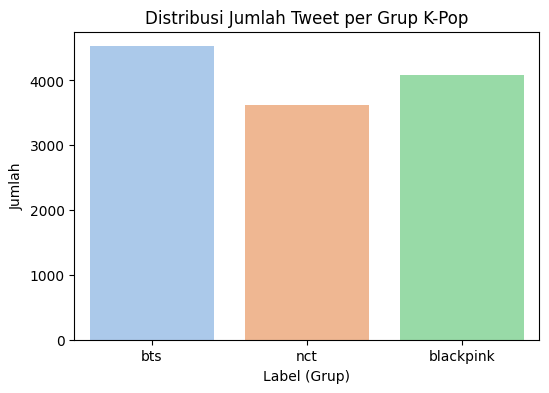

In [ ]:
# Visualisasi Distribusi Label (Jumlah Tweet per Grup)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='pastel')
plt.title('Distribusi Jumlah Tweet per Grup K-Pop')
plt.xlabel('Label (Grup)')
plt.ylabel('Jumlah')
plt.show()


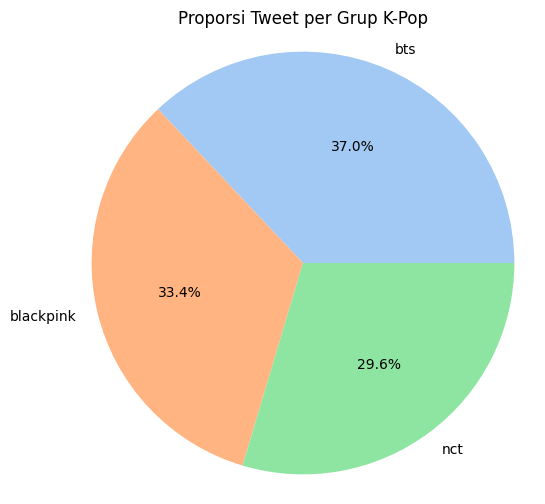

In [ ]:
# Pie Chart Proporsi Tweet
tweet_counts = df['label'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(tweet_counts.values, labels=tweet_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proporsi Tweet per Grup K-Pop')
plt.axis('equal')
plt.show()


**3.2 Visualisasi Panjang Teks**

<ipython-input-15-8130e33af1a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='text_length', palette='Set2')


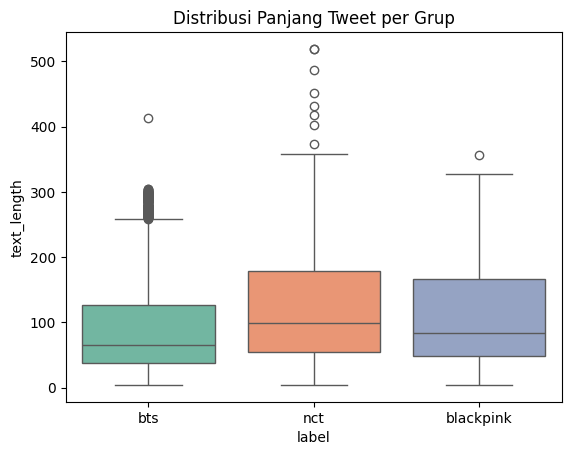

In [ ]:
# Rata-rata Panjang Tweet per Grup
df['text_length'] = df['full_text'].apply(lambda x: len(str(x)))
sns.boxplot(data=df, x='label', y='text_length', palette='Set2')
plt.title('Distribusi Panjang Tweet per Grup')
plt.show()


**3.3 Korelasi Fitur Numerik**

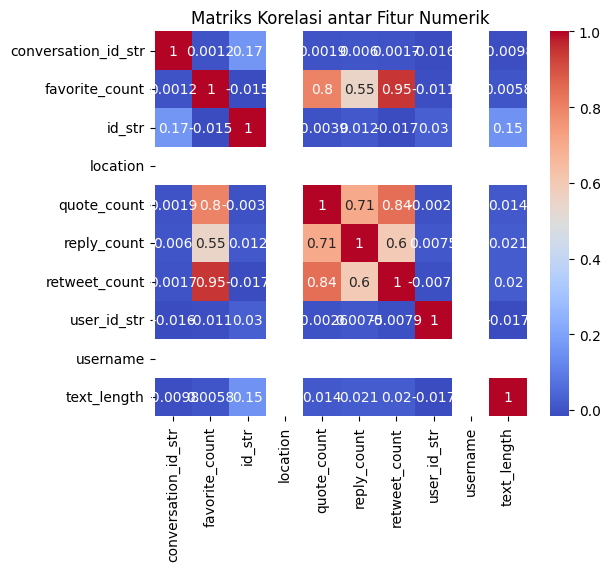

In [ ]:
# Korelasi Fitur Numerik
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(6,5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi antar Fitur Numerik")
plt.show()


**3.4 Wordcloud per Label**

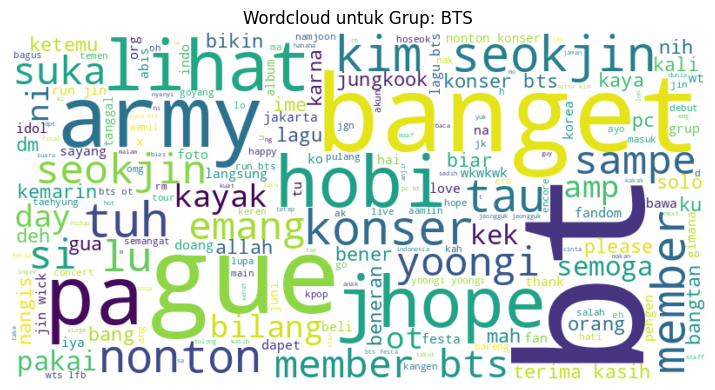

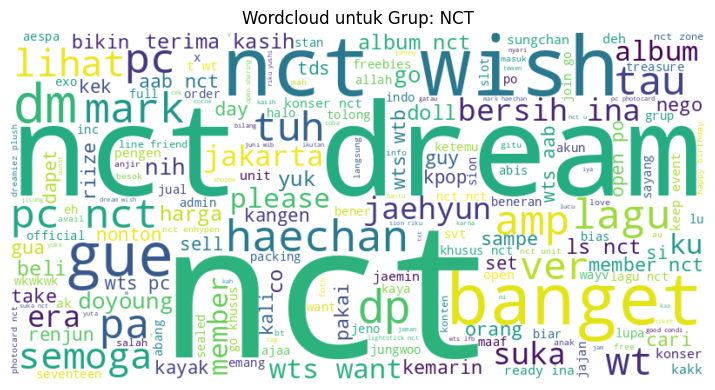

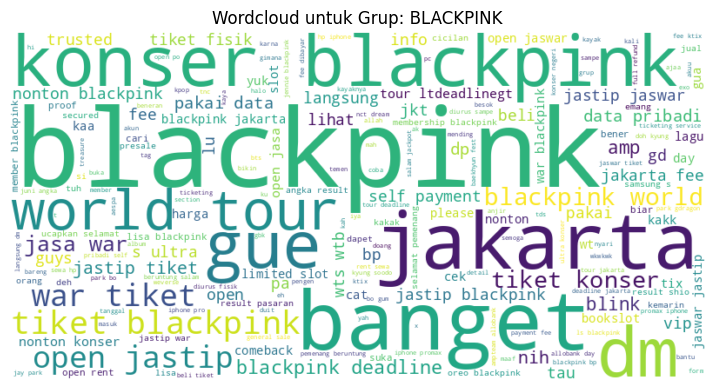

In [ ]:
# Wordcloud per Label
from wordcloud import WordCloud

for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['no_stopwords_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud untuk Grup: {label.upper()}')
    plt.tight_layout()
    plt.show()


**3.5 Visualisasi Frekuensi Kata**

<ipython-input-18-1816822982c4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Set2')


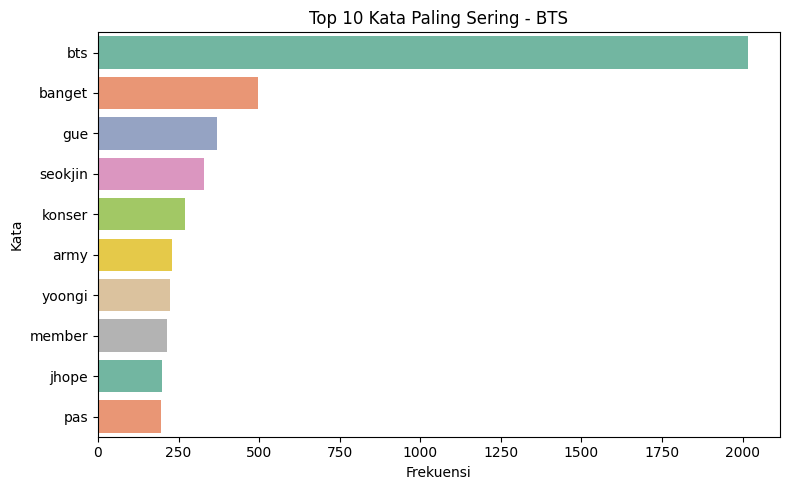

<ipython-input-18-1816822982c4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Set2')


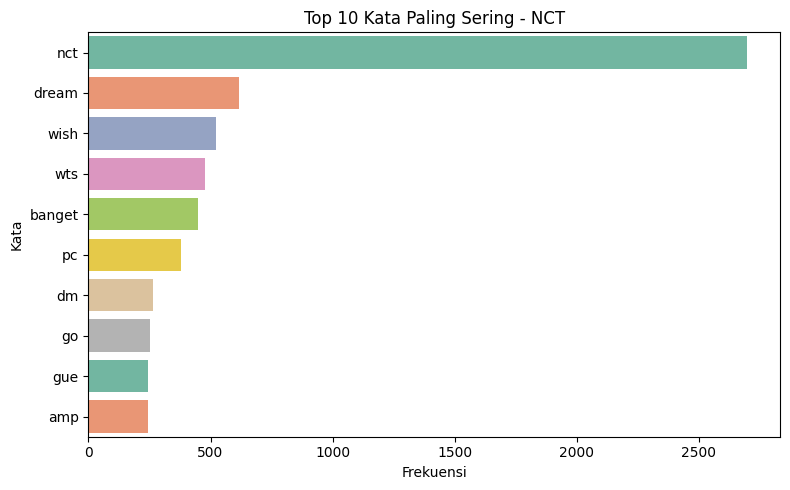

<ipython-input-18-1816822982c4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Set2')


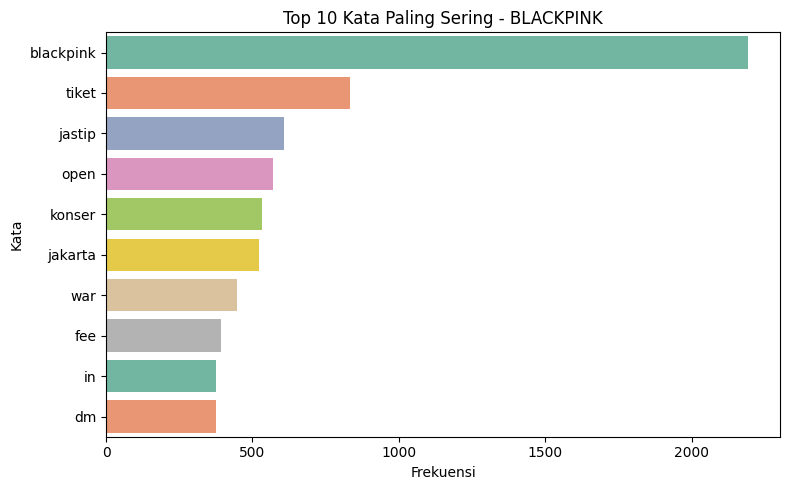

<ipython-input-18-1816822982c4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts_all), y=list(words_all), palette='viridis')


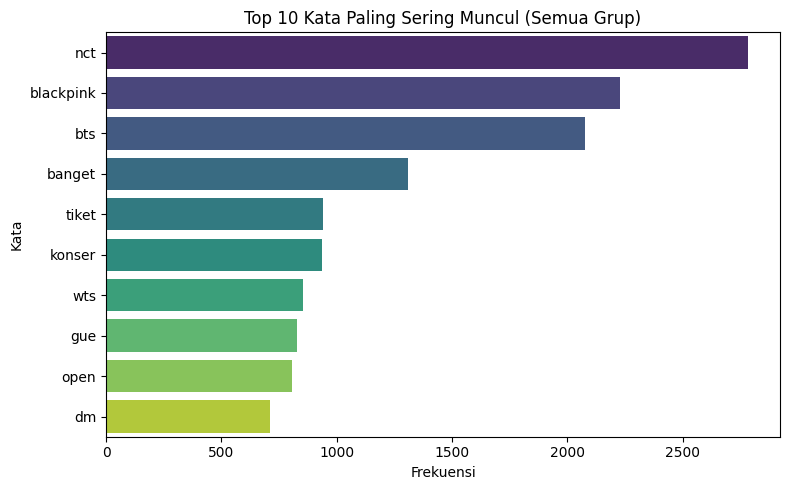

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Frekuensi Kata per Label
labels = df['label'].unique()

for label in labels:
    label_words = " ".join(df[df['label'] == label]['no_stopwords_text']).split()
    top_words = Counter(label_words).most_common(10)

    words, counts = zip(*top_words)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(counts), y=list(words), palette='Set2')
    plt.title(f"Top 10 Kata Paling Sering - {label.upper()}")
    plt.xlabel("Frekuensi")
    plt.ylabel("Kata")
    plt.tight_layout()
    plt.show()

# Visualisasi Gabungan Semua Grup
all_words = " ".join(df['no_stopwords_text']).split()
top_words_all = Counter(all_words).most_common(10)

words_all, counts_all = zip(*top_words_all)

plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts_all), y=list(words_all), palette='viridis')
plt.title("Top 10 Kata Paling Sering Muncul (Semua Grup)")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.tight_layout()
plt.show()


## **4. Pra-Pelatihan Model**

**4.1 Konversi TF-IDF**

In [ ]:
# Konversi TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['no_stopwords_text'])
y = df['label']

print("Shape TF-IDF:", X.shape)


Shape TF-IDF: (12221, 5000)


**4.2 Resampling Data**

In [ ]:
# Resampling Data

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Distribusi label setelah resampling:", Counter(y_resampled))


Distribusi label setelah resampling: Counter({'bts': 4525, 'nct': 4525, 'blackpink': 4525})


**4.3 Split Data**

In [ ]:
# Split Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


**4.4 Distribusi Label Setelah Resampling**

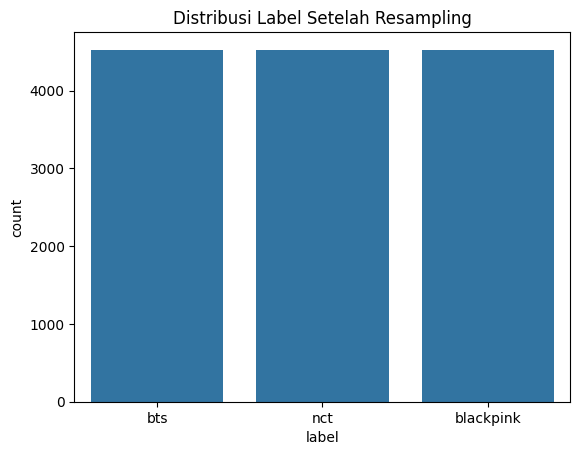

In [ ]:
# Visualisasi Distribusi Label (Setelah Resampling)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled)
plt.title('Distribusi Label Setelah Resampling')
plt.show()


## **5. Pelatihan Model**

**5.1 Model Non Neural Network: Naive Bayes**

In [ ]:
# Model Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7915285451197054


**5.2 Model Non Neural Network: Logistic Regression**

In [ ]:
# Model Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8523020257826888


**5.3 Model Neural Network: Multilayer Perceptron (MLP)**

In [ ]:
# Model Multilayer Perceptron
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))


MLP Accuracy: 0.8136279926335175


**5.4 Model Neural Network: Simple Neural Network**

In [ ]:
# Model Simple NN (Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 kelas: bts, nct, blackpink
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Encode label ke angka
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

model.fit(X_train.toarray(), y_train_enc, epochs=5, batch_size=32, validation_data=(X_test.toarray(), y_test_enc))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6516 - loss: 0.8397 - val_accuracy: 0.8457 - val_loss: 0.3841
Epoch 2/5
340/340 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8983 - loss: 0.2640 - val_accuracy: 0.8405 - val_loss: 0.4007
Epoch 3/5
340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9354 - loss: 0.1745 - val_accuracy: 0.8479 - val_loss: 0.4386
Epoch 4/5
340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9470 - loss: 0.1368 - val_accuracy: 0.8383 - val_loss: 0.4986
Epoch 5/5
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9471 - loss: 0.1250 - val_accuracy: 0.8427 - val_loss: 0.5230


## **6. Evaluasi Model**

Evaluasi Model: Naive Bayes
Accuracy: 0.7915285451197054
Classification Report:
               precision    recall  f1-score   support

   blackpink       0.85      0.75      0.79       929
         bts       0.79      0.80      0.79       930
         nct       0.74      0.83      0.79       856

    accuracy                           0.79      2715
   macro avg       0.79      0.79      0.79      2715
weighted avg       0.80      0.79      0.79      2715



<Figure size 500x400 with 0 Axes>

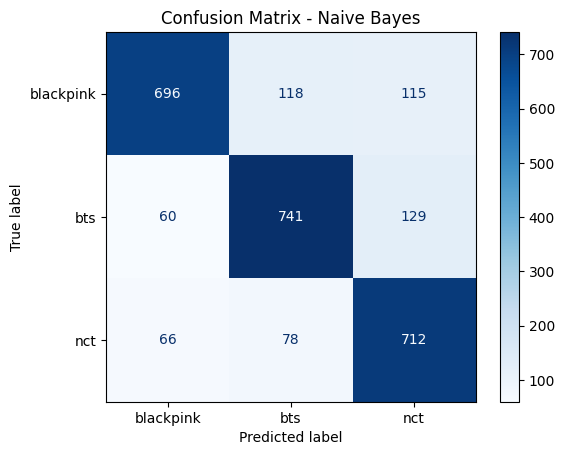


--------------------------------------------------

Evaluasi Model: Logistic Regression
Accuracy: 0.8523020257826888
Classification Report:
               precision    recall  f1-score   support

   blackpink       0.87      0.82      0.84       929
         bts       0.79      0.92      0.85       930
         nct       0.92      0.82      0.87       856

    accuracy                           0.85      2715
   macro avg       0.86      0.85      0.85      2715
weighted avg       0.86      0.85      0.85      2715



<Figure size 500x400 with 0 Axes>

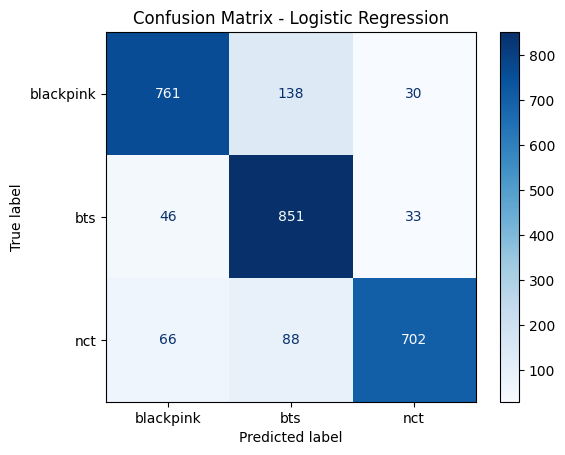


--------------------------------------------------

Evaluasi Model: MLP Classifier
Accuracy: 0.8136279926335175
Classification Report:
               precision    recall  f1-score   support

   blackpink       0.82      0.78      0.80       929
         bts       0.79      0.82      0.81       930
         nct       0.84      0.84      0.84       856

    accuracy                           0.81      2715
   macro avg       0.81      0.81      0.81      2715
weighted avg       0.81      0.81      0.81      2715



<Figure size 500x400 with 0 Axes>

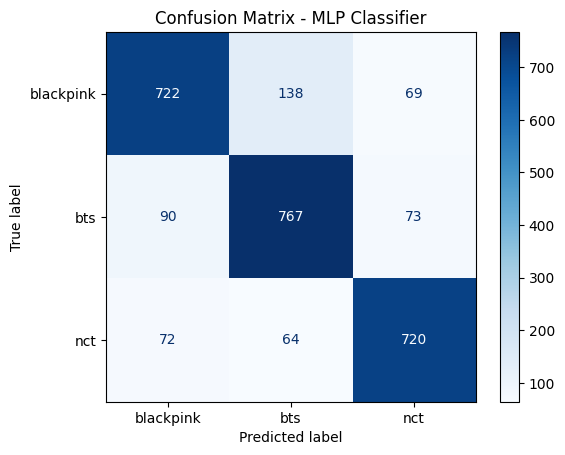


--------------------------------------------------

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Evaluasi Model: Simple NN (Keras)
Accuracy: 0.8427255985267035
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       929
           1       0.82      0.85      0.83       930
           2       0.88      0.85      0.86       856

    accuracy                           0.84      2715
   macro avg       0.84      0.84      0.84      2715
weighted avg       0.84      0.84      0.84      2715



<Figure size 500x400 with 0 Axes>

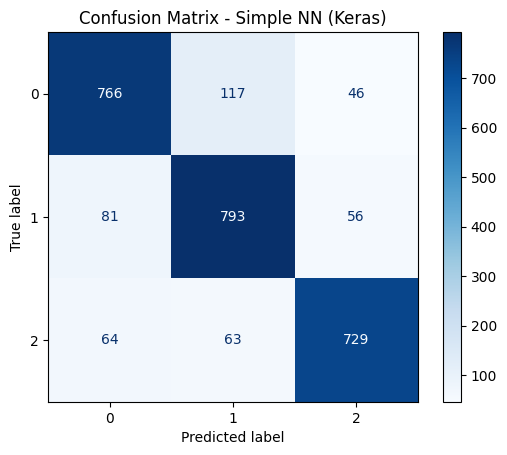


--------------------------------------------------



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Fungsi Evaluasi Model
def evaluasi_model(nama_model, y_true, y_pred):
    print(f"Evaluasi Model: {nama_model}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    plt.figure(figsize=(5, 4))
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
    plt.title(f"Confusion Matrix - {nama_model}")
    plt.show()
    print("\n" + "-"*50 + "\n")

# Evaluasi Semua Model
evaluasi_model("Naive Bayes", y_test, y_pred_nb)
evaluasi_model("Logistic Regression", y_test, y_pred_lr)
evaluasi_model("MLP Classifier", y_test, y_pred_mlp)
evaluasi_model("Simple NN (Keras)", y_test_enc, model.predict(X_test.toarray()).argmax(axis=1))


## **7. Pengujian Prediksi Kategori Tweet**

In [ ]:
# Prediksi Kategori Tweet
def prediksi_kalimat(text):
    cleaned = clean_text(text)
    cleaned = ' '.join([w for w in cleaned.split() if w not in stop_words])
    tfidf_input = tfidf.transform([cleaned])

    pred_nb = nb.predict(tfidf_input)[0]
    pred_lr = lr.predict(tfidf_input)[0]
    pred_mlp = mlp.predict(tfidf_input)[0]
    pred_keras = le.inverse_transform(model.predict(tfidf_input.toarray()).argmax(axis=1))[0]

    print("Naive Bayes: ", pred_nb)
    print("Logistic Regression: ", pred_lr)
    print("MLP Classifier: ", pred_mlp)
    print("Simple NN (Keras): ", pred_keras)

# Contoh uji
prediksi_kalimat("oreo blackpink enak bgttt")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Naive Bayes:  blackpink
Logistic Regression:  blackpink
MLP Classifier:  blackpink
Simple NN (Keras):  blackpink
